Source:
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

# Imports and environment set-up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Load Data and inspect

In [4]:
df = pd.read_csv("./data/ds_salaries.csv")
df.drop(["Unnamed: 0", "salary", "salary_currency"], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [9]:
for col_name in df.columns:
    print(f"Column: {col_name}")
    print(df[col_name].value_counts())
    print("\n")

Column: work_year
2022    318
2021    217
2020     72
Name: work_year, dtype: int64


Column: experience_level
SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


Column: employment_type
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


Column: job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer       

## Initial Observations:
1. Majority of the data sourced has its employees as Full-Time employees
2. Majority of the jobs in this dataset are in the United States, with a large gap in the next highest (United Kingdom)
3. Distribution of the experience levels are relatively evently split
4. Additional processing is required for job titles to standardize them in conjunction with experience levels

# EDA

### Check for msising values

In [10]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Check for duplicates and drop if needed

In [12]:
df.duplicated().sum()

42

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

# Univariate Analysis

### Experience Levels

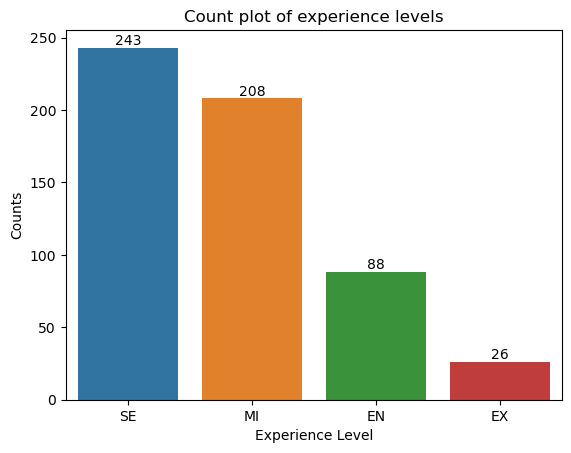

In [36]:
plt.title("Count plot of experience levels")
splot = sns.countplot(x = 'experience_level', data=df, order=df.experience_level.value_counts().sort_values(ascending=False).index)
plt.bar_label(splot.containers[0])
plt.xlabel("Experience Level")
plt.ylabel("Counts")
plt.show()

### Work Year

In [55]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [61]:
df["remote_ratio"].value_counts().sort_values(ascending=False).index

Int64Index([100, 0, 50], dtype='int64')

[]

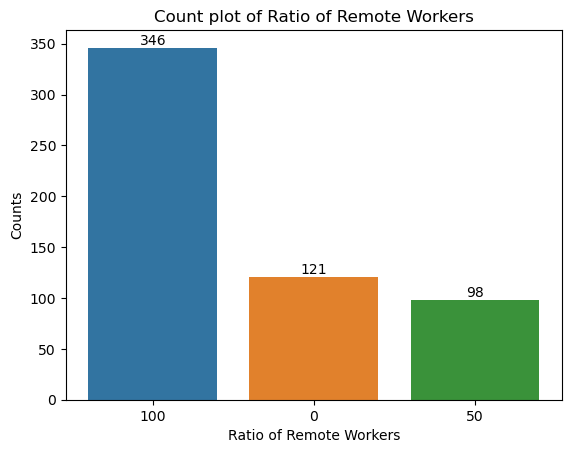

In [66]:
splot = sns.countplot(x="remote_ratio", data=df, order=df["remote_ratio"].value_counts().sort_values(ascending=False).index)
plt.title("Count plot of Ratio of Remote Workers")
plt.bar_label(splot.containers[0])
plt.xlabel("Ratio of Remote Workers")
plt.ylabel("Counts")
plt.plot()

From the count plot of remote worker ratio, we can see that majority of the workers work remotely